In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../data/raw/enhanced_fraud_detection_dataset.csv')


In [3]:
df.shape

(50000, 25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   transaction_id            50000 non-null  object 
 1   user_id                   50000 non-null  int64  
 2   amount                    50000 non-null  float64
 3   payment_method            47488 non-null  object 
 4   device_type               47504 non-null  object 
 5   mouse_movement_score      47533 non-null  float64
 6   geo_location              45009 non-null  object 
 7   ip_risk_score             47549 non-null  float64
 8   account_age_days          50000 non-null  int64  
 9   time_of_day               50000 non-null  int64  
 10  day_of_week               47464 non-null  object 
 11  num_prev_transactions     50000 non-null  int64  
 12  avg_transaction_amount    47572 non-null  float64
 13  is_international          50000 non-null  int64  
 14  is_vpn

In [5]:
df.head()

,transaction_id,user_id,amount,payment_method,device_type,mouse_movement_score,geo_location,ip_risk_score,account_age_days,time_of_day,...,fraud_flag,region,country,timestamp,session_duration_sec,device_os,browser,suspicious_activity_flag,login_attempts_last_hour,is_blacklisted_user
0,txn_45089,3428,40.98,credit_card,mobile,0.44,Delhi,0.22,364,20,...,0,North,India,2025-02-27 20:00:00,368,Android,Firefox,0,6,0
1,txn_32802,4141,90.58,upi,tablet,0.71,Bangalore,0.12,1768,20,...,0,South,India,2025-02-17 20:00:00,385,Android,Edge,0,5,0
2,txn_3379,1123,26.75,bnpl,tablet,0.39,NaN,0.40,1487,9,...,0,Other,India,2025-01-27 09:00:00,341,iOS,Edge,0,6,0
3,txn_10978,2930,390.88,debit_card,desktop,0.24,Unknown,NaN,1634,11,...,0,Unknown,India,2025-01-04 11:00:00,512,Linux,Firefox,0,6,0
4,txn_7477,1656,51.67,credit_card,mobile,0.11,Mumbai,0.47,745,23,...,0,West,India,2025-01-29 23:00:00,61,iOS,Opera,0,3,0


In [15]:
missing = df.isnull().sum()

In [10]:
df['fraud_flag'].value_counts(normalize=True)*100

fraud_flag
0    97.0
1     3.0
Name: proportion, dtype: float64

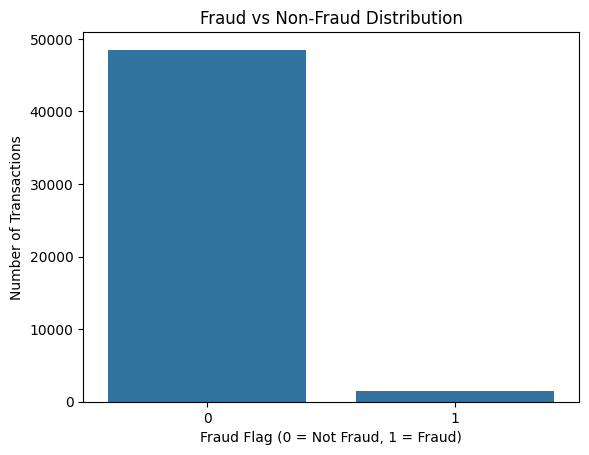

In [12]:
sns.countplot(data=df, x='fraud_flag')
plt.title('Fraud vs Non-Fraud Distribution')
plt.xlabel('Fraud Flag (0 = Not Fraud, 1 = Fraud)')
plt.ylabel('Number of Transactions')
plt.show()

In [13]:
missing_percent = (df.isnull().sum()/len(df))*100

In [14]:
missing_percent

transaction_id              0.000
user_id                     0.000
amount                      0.000
payment_method              5.024
device_type                 4.992
mouse_movement_score        4.934
geo_location                9.982
ip_risk_score               4.902
account_age_days            0.000
time_of_day                 0.000
day_of_week                 5.072
num_prev_transactions       0.000
avg_transaction_amount      4.856
is_international            0.000
is_vpn                      0.000
fraud_flag                  0.000
region                      0.000
country                     0.000
timestamp                   0.000
session_duration_sec        0.000
device_os                   0.000
browser                     0.000
suspicious_activity_flag    0.000
login_attempts_last_hour    0.000
is_blacklisted_user         0.000
dtype: float64

In [16]:
missing_df = pd.DataFrame({'missing_value':missing, 'missing_value_%': missing_percent}).sort_values(by = "missing_value_%", ascending=False)

In [19]:
missing_df[missing_df['missing_value']>0]

,missing_value,missing_value_%
geo_location,4991,9.982
day_of_week,2536,5.072
payment_method,2512,5.024
device_type,2496,4.992
mouse_movement_score,2467,4.934
ip_risk_score,2451,4.902
avg_transaction_amount,2428,4.856


In [37]:
for col in df.columns:
    print(col, df[col].unique())

transaction_id ['txn_45089' 'txn_32802' 'txn_3379' ... 'txn_32353' 'txn_30848'
 'txn_40526']
user_id [3428 4141 1123 ... 3408 2170 4566]
amount [ 40.98  90.58  26.75 ... 229.07 222.44 183.08]
payment_method ['credit_card' 'upi' 'bnpl' 'debit_card' 'wallet' 'net_banking' nan]
device_type ['mobile' 'tablet' 'desktop' nan]
mouse_movement_score [0.44 0.71 0.39 0.24 0.11 0.13 0.12 0.38  nan 0.14 0.08 0.55 0.31 0.46
 0.29 0.25 0.16 0.3  0.23 0.22 0.2  0.19 0.54 0.15 0.07 0.32 0.28 0.52
 0.51 0.21 0.49 0.35 0.5  0.43 0.57 0.17 0.18 0.09 0.33 0.4  0.72 0.1
 0.45 0.58 0.34 0.02 0.41 0.36 0.26 0.37 0.47 0.05 0.63 0.27 0.01 0.03
 0.53 0.06 0.42 0.48 0.62 0.04 0.6  0.73 0.56 0.61 0.69 0.65 0.64 0.8
 0.78 0.59 0.89 0.68 0.67 0.7  0.75 0.76 0.82 0.74 0.66 0.   0.77 0.85
 0.79 0.81 0.84 0.93 0.83 0.87 0.86 0.9 ]
geo_location ['Delhi' 'Bangalore' nan 'Unknown' 'Mumbai' 'London' 'Dubai' 'New York']
ip_risk_score [0.22 0.12 0.4   nan 0.47 0.93 0.33 0.68 0.91 0.97 0.04 0.37 0.05 0.78
 0.87 0.19 0.15 0.08